In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('resultados_BreastCancerWisconsin.csv')

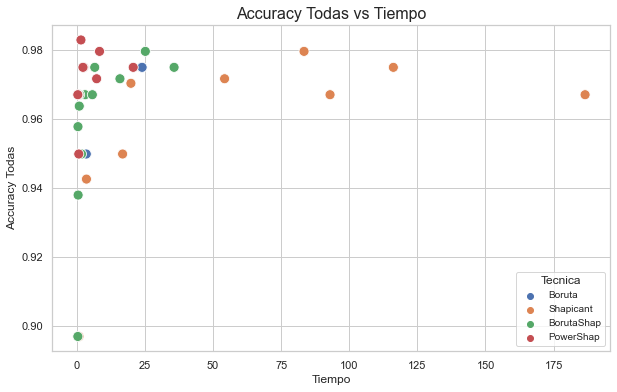

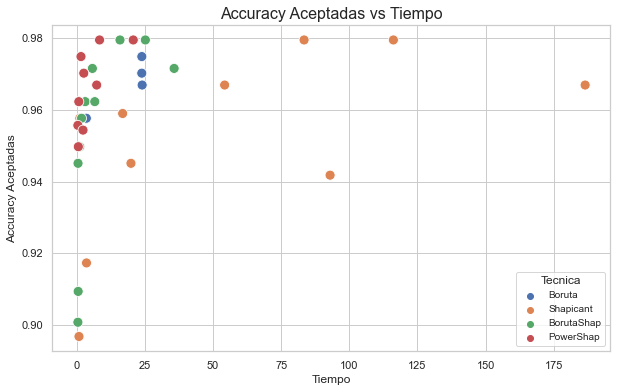

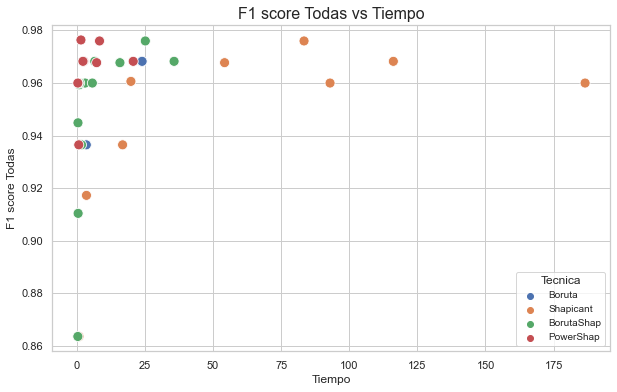

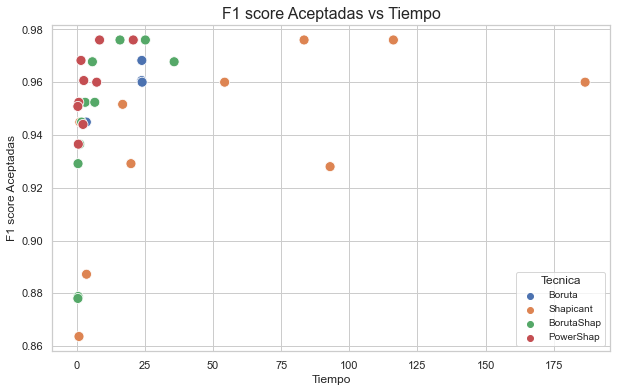

In [3]:
sns.set(style="whitegrid")

# Gráfico 1: Accuracy Todas vs Tiempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Tiempo", y="Accuracy Todas", hue="Tecnica", s=100)
plt.title("Accuracy Todas vs Tiempo", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Accuracy Todas", fontsize=12)
plt.legend(title="Tecnica", fontsize=10)
plt.show()

# Gráfico 2: Accuracy Aceptadas vs Tiempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Tiempo", y="Accuracy Aceptadas", hue="Tecnica", s=100)
plt.title("Accuracy Aceptadas vs Tiempo", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Accuracy Aceptadas", fontsize=12)
plt.legend(title="Tecnica", fontsize=10)
plt.show()

# Gráfico 3: F1 score Todas vs Tiempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Tiempo", y="F1 score Todas", hue="Tecnica", s=100)
plt.title("F1 score Todas vs Tiempo", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("F1 score Todas", fontsize=12)
plt.legend(title="Tecnica", fontsize=10)
plt.show()

# Gráfico 4: F1 score Aceptadas vs Tiempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Tiempo", y="F1 score Aceptadas", hue="Tecnica", s=100)
plt.title("F1 score Aceptadas vs Tiempo", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("F1 score Aceptadas", fontsize=12)
plt.legend(title="Tecnica", fontsize=10)
plt.show()

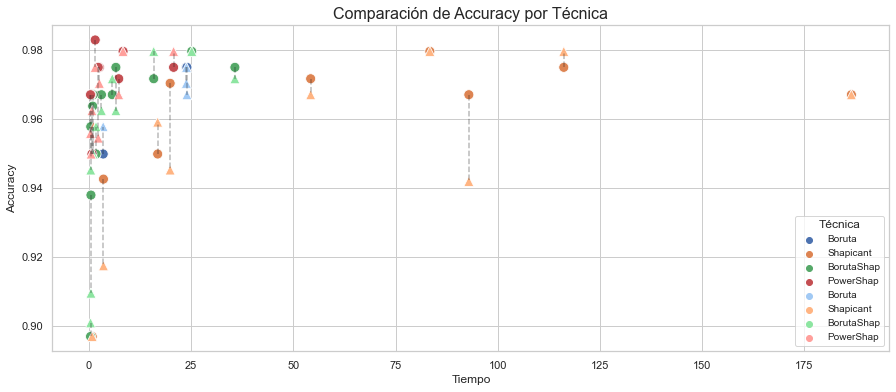

In [4]:
sns.set(style="whitegrid")

# Crear una figura con un subplot
fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico 1: Accuracy Todas vs Tiempo
sns.scatterplot(data=data, x="Tiempo", y="Accuracy Todas", hue="Tecnica", s=100, ax=ax, marker='o')

# Gráfico 2: Accuracy Aceptadas vs Tiempo
sns.scatterplot(data=data, x="Tiempo", y="Accuracy Aceptadas", palette="pastel", hue="Tecnica", s=100, ax=ax, marker='^')

# Unir los puntos correspondientes con líneas
for i in range(len(data)):
    if data.loc[i, 'Accuracy Todas'] > 0.8 and data.loc[i, 'Accuracy Aceptadas'] > 0.8:
        ax.plot([data.loc[i, 'Tiempo'], data.loc[i, 'Tiempo']], [data.loc[i, 'Accuracy Todas'], data.loc[i, 'Accuracy Aceptadas']], 'k--', alpha=0.3)

# Configuración del gráfico
ax.set_title("Comparación de Accuracy por Técnica", fontsize=16)
ax.set_xlabel("Tiempo", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.legend(title="Técnica", fontsize=10)

# Mostrar el gráfico combinado
plt.show()


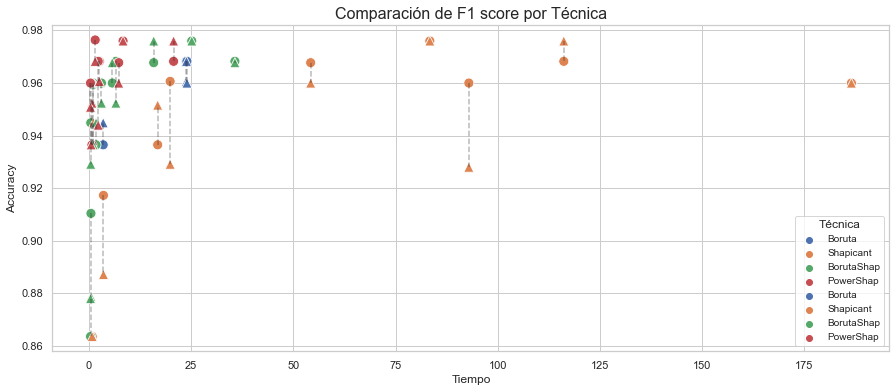

In [5]:
sns.set(style="whitegrid")

# Crear una figura con un subplot
fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico 1: Accuracy Todas vs Tiempo
sns.scatterplot(data=data, x="Tiempo", y="F1 score Todas", hue="Tecnica", s=100, ax=ax, marker='o')

# Gráfico 2: Accuracy Aceptadas vs Tiempo
sns.scatterplot(data=data, x="Tiempo", y="F1 score Aceptadas", hue="Tecnica", s=100, ax=ax, marker='^')

# Unir los puntos correspondientes con líneas
for i in range(len(data)):
    if data.loc[i, 'F1 score Todas'] > 0.8 and data.loc[i, 'F1 score Aceptadas'] > 0.8:
        ax.plot([data.loc[i, 'Tiempo'], data.loc[i, 'Tiempo']], [data.loc[i, 'F1 score Todas'], data.loc[i, 'F1 score Aceptadas']], 'k--', alpha=0.3)

# Configuración del gráfico
ax.set_title("Comparación de F1 score por Técnica", fontsize=16)
ax.set_xlabel("Tiempo", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.legend(title="Técnica", fontsize=10)

# Mostrar el gráfico combinado
plt.show()


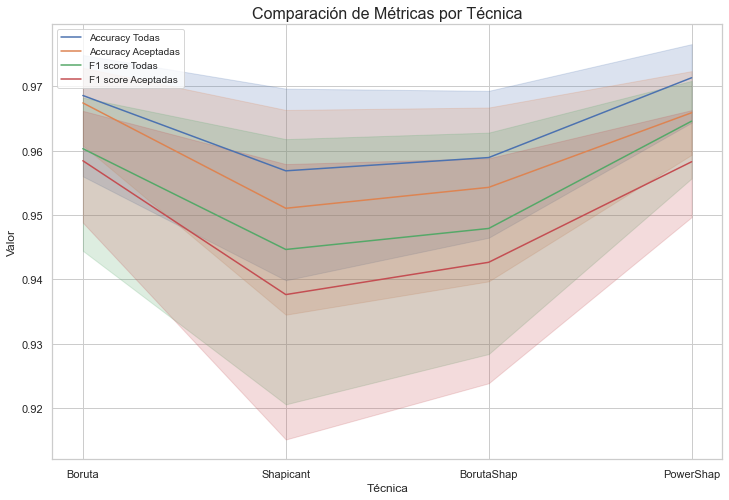

In [6]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x="Tecnica", y="Accuracy Todas", label="Accuracy Todas")
sns.lineplot(data=data, x="Tecnica", y="Accuracy Aceptadas", label="Accuracy Aceptadas")
sns.lineplot(data=data, x="Tecnica", y="F1 score Todas", label="F1 score Todas")
sns.lineplot(data=data, x="Tecnica", y="F1 score Aceptadas", label="F1 score Aceptadas")

# Configurar el gráfico
plt.title("Comparación de Métricas por Técnica", fontsize=16)
plt.xlabel("Técnica", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.show()


{'RandomForestClassifier(n_estimators=10)', 'RandomForestClassifier()', 'XGBClassifier()', 'RandomForestClassifier(n_estimators=50)'}


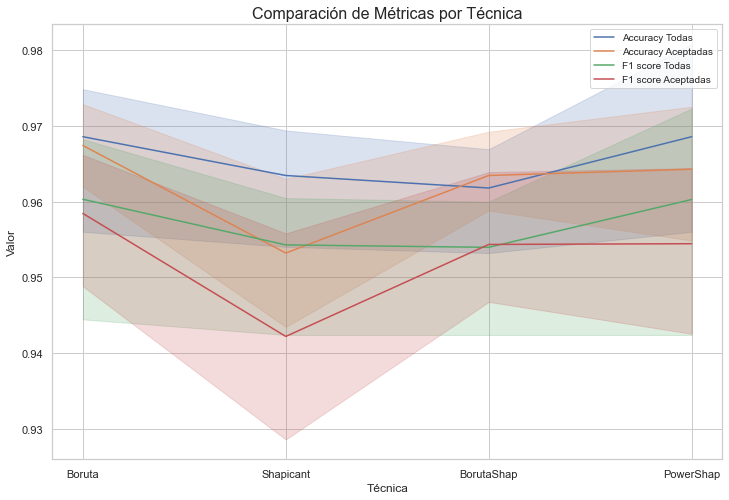

In [7]:
# Identificar los modelos comunes a todas las técnicas
modelos_comunes = set(data['Modelo'])
for tecnica in data['Tecnica'].unique():
    modelos_comunes = modelos_comunes.intersection(set(data[data['Tecnica'] == tecnica]['Modelo']))

print(modelos_comunes)
# Filtrar el DataFrame para incluir solo los registros de los modelos comunes
data_filtrada = data[data['Modelo'].isin(modelos_comunes)]

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_filtrada, x="Tecnica", y="Accuracy Todas", label="Accuracy Todas")
sns.lineplot(data=data_filtrada, x="Tecnica", y="Accuracy Aceptadas", label="Accuracy Aceptadas")
sns.lineplot(data=data_filtrada, x="Tecnica", y="F1 score Todas", label="F1 score Todas")
sns.lineplot(data=data_filtrada, x="Tecnica", y="F1 score Aceptadas", label="F1 score Aceptadas")

# Configurar el gráfico
plt.title("Comparación de Métricas por Técnica", fontsize=16)
plt.xlabel("Técnica", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.show()


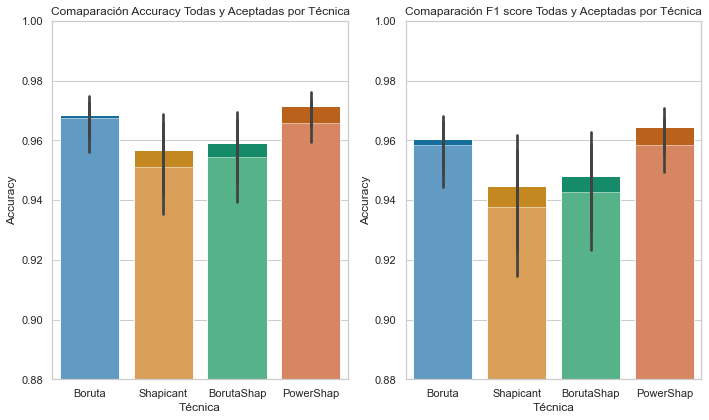

In [8]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Gráfico 1: Barras de Accuracy
sns.barplot(data=data, x="Tecnica", y="Accuracy Todas", palette="colorblind", alpha=1, ax=axes[0])
sns.barplot(data=data, x="Tecnica", y="Accuracy Aceptadas", palette="pastel", alpha=0.5, ax=axes[0])
axes[0].set_title("Comaparación Accuracy Todas y Aceptadas por Técnica")
axes[0].set_xlabel("Técnica")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0.88, 1)

# Gráfico 2: Barras de F1 score
sns.barplot(data=data, x="Tecnica", y="F1 score Todas", palette="colorblind", alpha=1, ax=axes[1])
sns.barplot(data=data, x="Tecnica", y="F1 score Aceptadas", palette="pastel", alpha=0.5, ax=axes[1])
axes[1].set_title("Comaparación F1 score Todas y Aceptadas por Técnica")
axes[1].set_xlabel("Técnica")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0.88, 1)

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


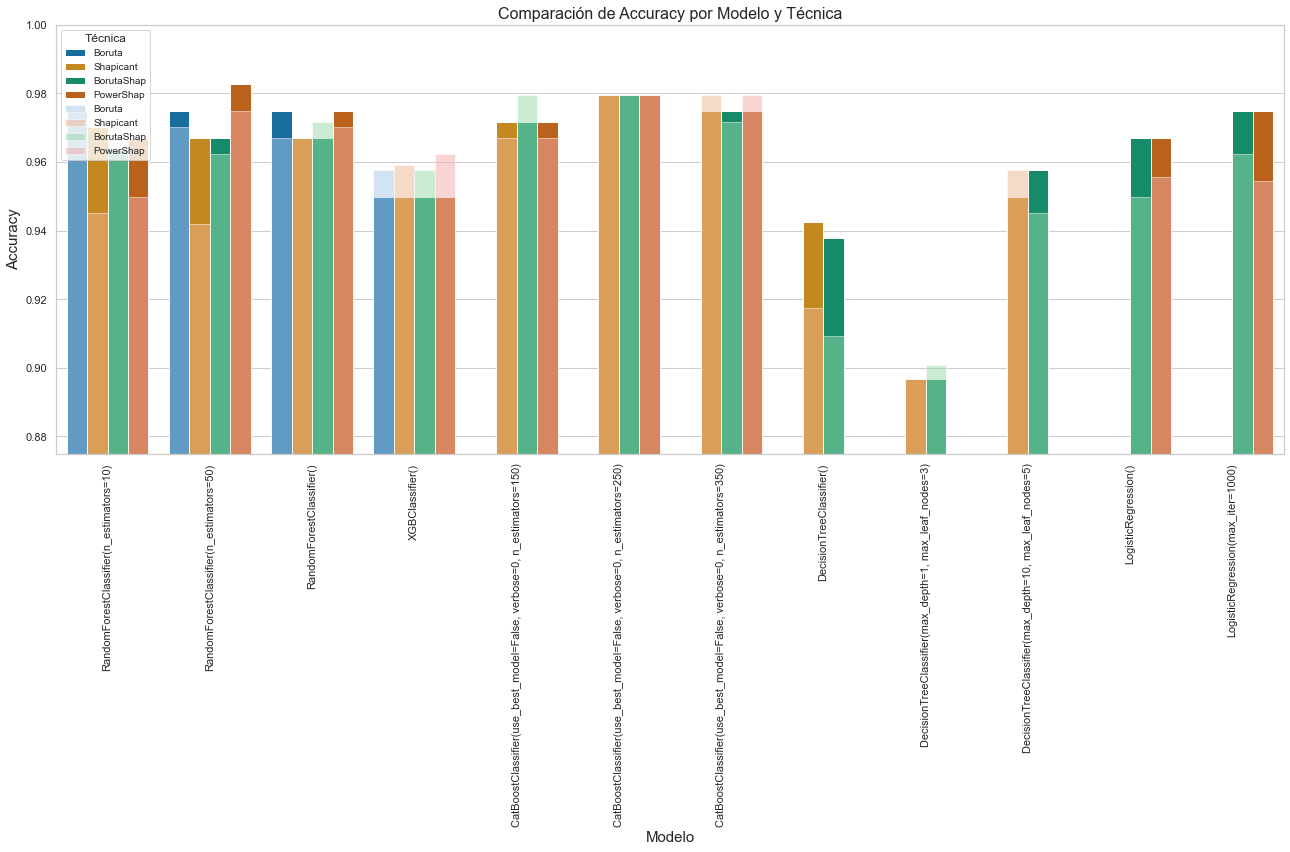

In [9]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(18, 12))
ax = sns.barplot(data=data, x="Modelo", y="Accuracy Todas", hue="Tecnica", palette="colorblind", alpha=1)
sns.barplot(data=data, x="Modelo", y="Accuracy Aceptadas", hue="Tecnica", palette="pastel", alpha=0.5)

# Configurar el gráfico
plt.title("Comparación de Accuracy por Modelo y Técnica", fontsize=16)
plt.xlabel("Modelo", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(rotation=90)  # Rotar los nombres y alinear a la derecha

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Limitar el rango del eje y
plt.ylim(0.875, 1)

# Mostrar la leyenda
plt.legend(title="Técnica", fontsize=10)

# Mostrar el gráfico
plt.show()


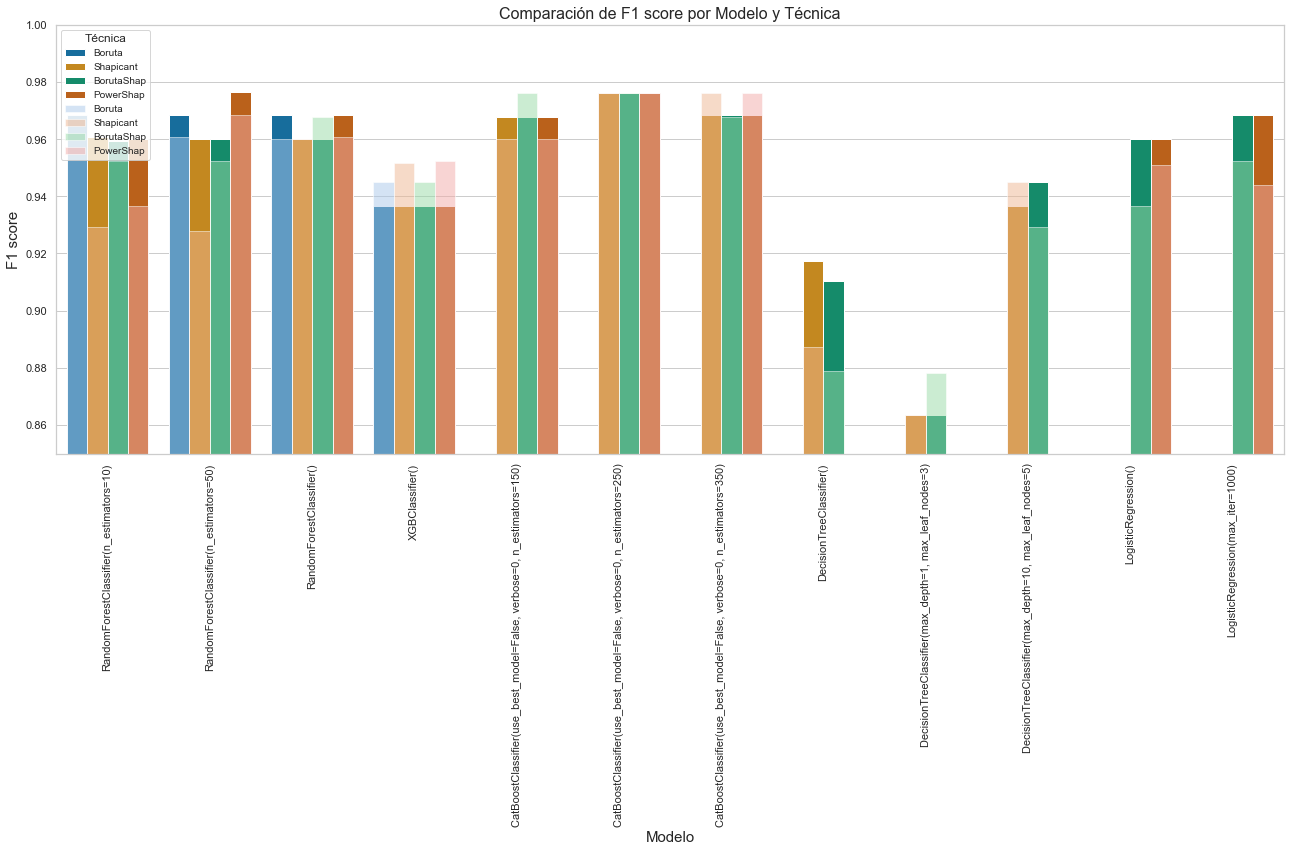

In [10]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(18, 12))
ax = sns.barplot(data=data, x="Modelo", y="F1 score Todas", hue="Tecnica", palette="colorblind", alpha=1)
sns.barplot(data=data, x="Modelo", y="F1 score Aceptadas", hue="Tecnica", palette="pastel", alpha=0.5)

# Configurar el gráfico
plt.title("Comparación de F1 score por Modelo y Técnica", fontsize=16)
plt.xlabel("Modelo", fontsize=15)
plt.ylabel("F1 score", fontsize=15)
plt.xticks(rotation=90)  # Rotar los nombres y alinear a la derecha

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Limitar el rango del eje y
plt.ylim(0.85, 1)

# Mostrar la leyenda
plt.legend(title="Técnica", fontsize=10)

# Mostrar el gráfico
plt.show()


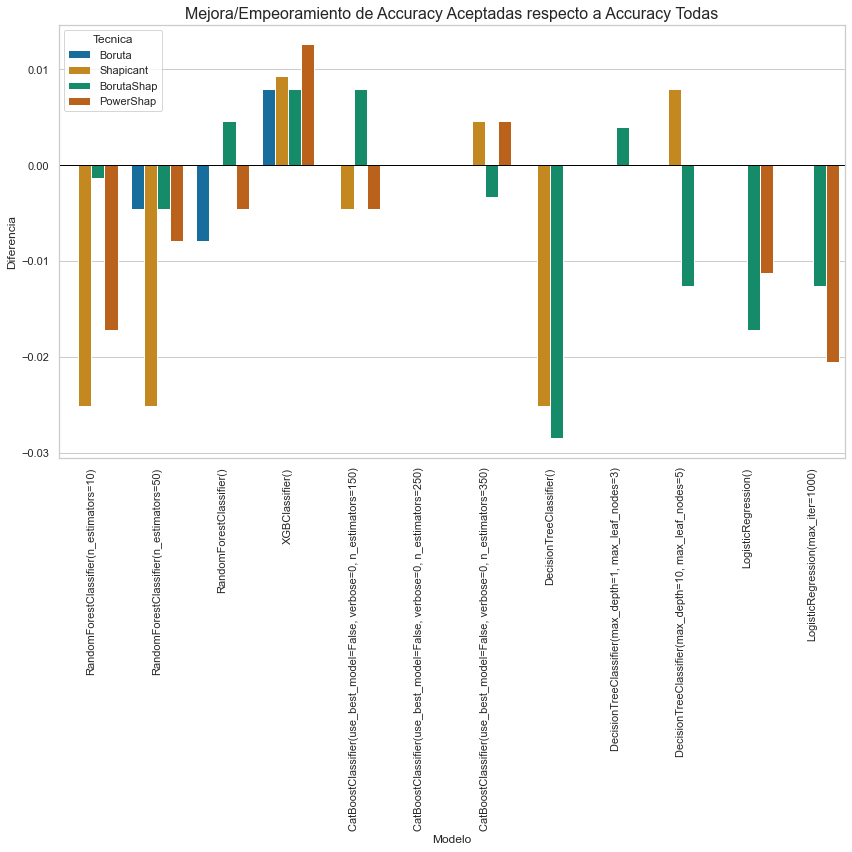

In [11]:
# Calcular la diferencia entre Accuracy Aceptadas y Accuracy Todas
data['Diferencia'] = data['Accuracy Aceptadas'] - data['Accuracy Todas']

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 12))
ax = sns.barplot(data=data, x="Modelo", y="Diferencia", hue="Tecnica", palette="colorblind", alpha=1)

# Agregar línea en el valor 0
ax.axhline(0, color='black', linewidth=1)

# Configurar el gráfico
plt.title("Mejora/Empeoramiento de Accuracy Aceptadas respecto a Accuracy Todas", fontsize=16)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Diferencia", fontsize=12)
plt.xticks(rotation=90)  # Rotar los nombres y alinear a la derecha

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


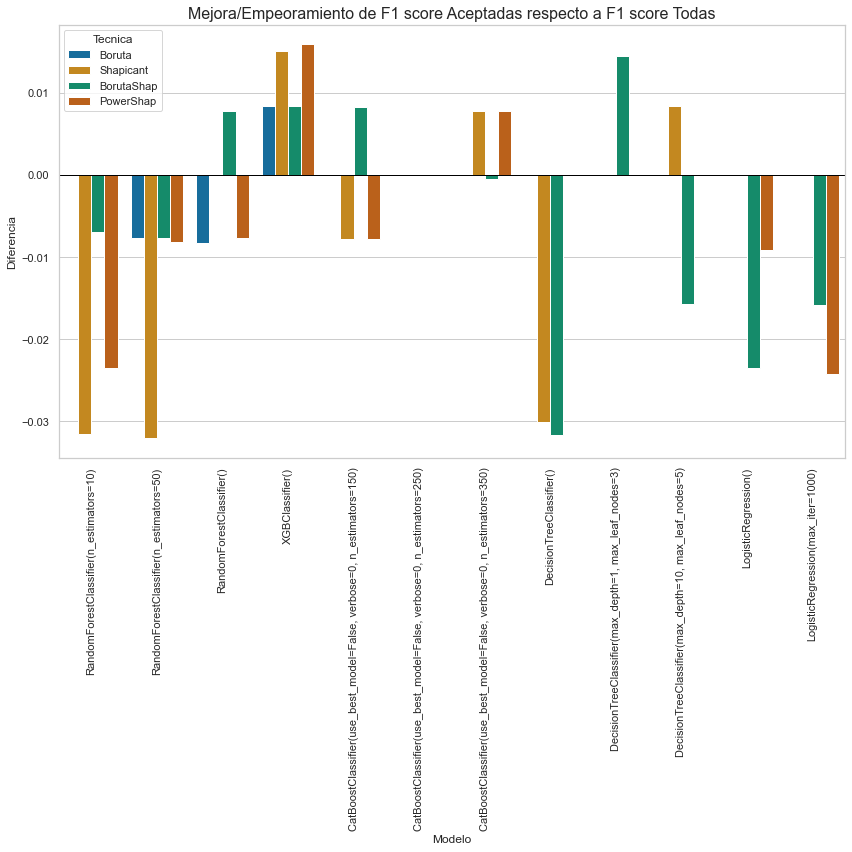

In [12]:
# Calcular la diferencia entre Accuracy Aceptadas y Accuracy Todas
data['Diferencia'] = data['F1 score Aceptadas'] - data['F1 score Todas']

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 12))
ax = sns.barplot(data=data, x="Modelo", y="Diferencia", hue="Tecnica", palette="colorblind", alpha=1)

# Agregar línea en el valor 0
ax.axhline(0, color='black', linewidth=1)

# Configurar el gráfico
plt.title("Mejora/Empeoramiento de F1 score Aceptadas respecto a F1 score Todas", fontsize=16)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Diferencia", fontsize=12)
plt.xticks(rotation=90)  # Rotar los nombres y alinear a la derecha

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


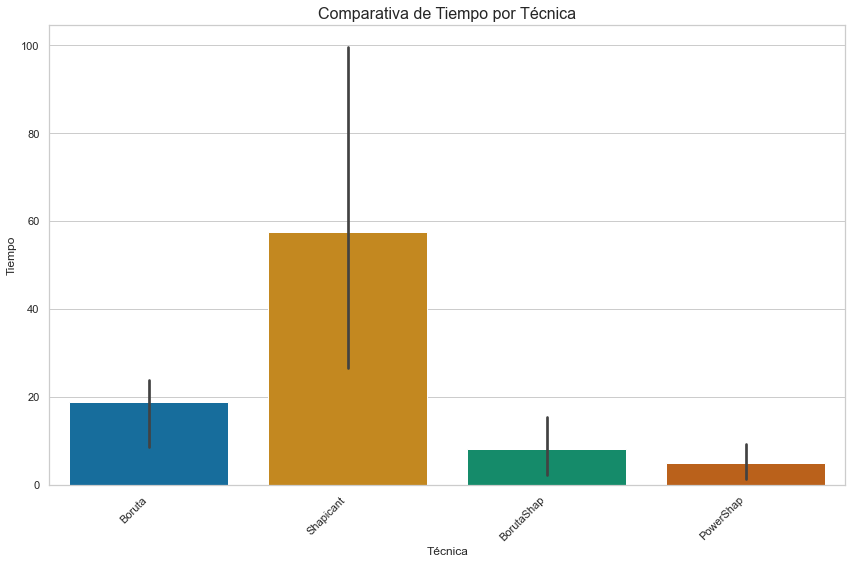

In [13]:
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x="Tecnica", y="Tiempo", palette="colorblind")

# Configurar el gráfico
plt.title("Comparativa de Tiempo por Técnica", fontsize=16)
plt.xlabel("Técnica", fontsize=12)
plt.ylabel("Tiempo", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar los nombres y alinear a la derecha

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


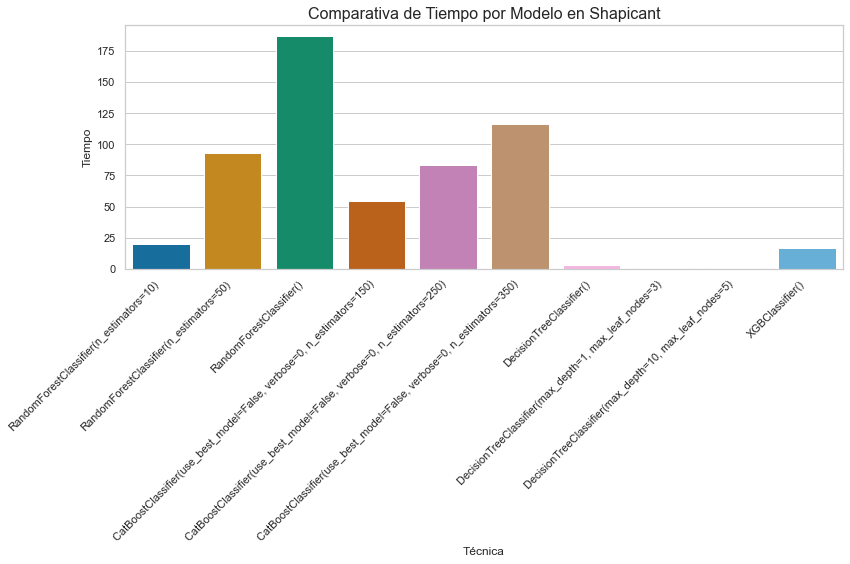

In [14]:
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=data[data["Tecnica"] == "Shapicant"], x="Modelo", y="Tiempo", palette="colorblind")

# Configurar el gráfico
plt.title("Comparativa de Tiempo por Modelo en Shapicant", fontsize=16)
plt.xlabel("Técnica", fontsize=12)
plt.ylabel("Tiempo", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar los nombres y alinear a la derecha

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()
